In [1]:
from tensorflow import keras


In [4]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [6]:
train_input.shape # 60000장의 사진이 28 by 28로 이루어져있음

(60000, 28, 28)

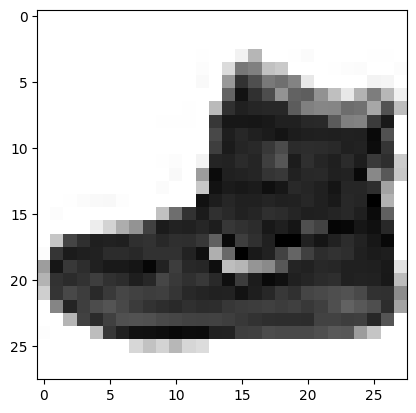

In [9]:
import matplotlib.pyplot as plt

plt.imshow(train_input[0], cmap='gray_r')

In [10]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)  # reshape = 데이터를 일자로 핌 # -1은 60000장을의미

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter = 5)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)

In [14]:
import tensorflow as tf

In [15]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [16]:
dense = keras.layers.Dense(10, activation='softmax', input_shape= (784,)) # keras 안에 layers안에 dense층 # 784개의 입력을 10개의 뉴런으로 만들고 이걸 softmax함수를 이용해 확률로 만들거임

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model = keras.Sequential([dense]) # dense층 하나만 있는 모델을 만들음

In [26]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # metrics = 어떤걸 기준으로 학습할지

In [27]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8613 - loss: 0.4085
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8629 - loss: 0.4016
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8639 - loss: 0.4088
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8622 - loss: 0.4085
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8653 - loss: 0.4030


In [29]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.4185


[0.43808281421661377, 0.8543999791145325]